## Python Sentiment Analysis Dataset

The dataset contains more than 14000 tweets data samples classified into 3 types: positive, negative, neutral
    
-------------------------------------------------------------------------------------------------------------------------------

Bu, farklı alanlardaki işletmelerin müşterilerinin markalarına yönelik duygularını/duygularını anlamalarına yardımcı olan ilginç bir projedir.

In [1]:
!pip install pandas matplotlib tensorflow

    Data Preprocessing

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("Tweets.csv")

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# We only need the text and sentiment column.
# Yalnızca metin ve duygu sütununa ihtiyacımız var.

In [6]:
review_data= data[["text","airline_sentiment"]]

In [7]:
review_data.shape

(14640, 2)

In [8]:
review_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [9]:
# There are more than 14,000 data samples in the sentiment analysis dataset.
# Duygu analizi veri setinde 14.000'den fazla veri örneği bulunmaktadır.

In [10]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
review_data.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [12]:
# We don’t really need neutral reviews in our dataset for this binary classification problem. So, drop those rows from the dataset.
# Bu ikili sınıflandırma problemi için veri setimizde gerçekten tarafsız incelemelere ihtiyacımız yok. Bu nedenle, bu satırları veri kümesinden bırakın.

In [13]:
review_data=review_data[review_data["airline_sentiment"] != "neutral"]

In [14]:
review_data.shape

(11541, 2)

In [15]:
review_data.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [16]:
review_data.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive


In [17]:
review_data["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [18]:
# The labels for this dataset are categorical. Machines understand only numeric data. So, convert the categorical values to numeric using the factorize() method. This returns an array of numeric values and an Index of categories.
# Bu veri kümesinin etiketleri kategoriktir. Makineler yalnızca sayısal verileri anlar. Bu nedenle, factorize() yöntemini kullanarak kategorik değerleri sayısala dönüştürün. Bu, bir sayısal değerler dizisi ve bir kategori Dizini döndürür.

In [19]:
sentiment_label=review_data.airline_sentiment.factorize()

In [20]:
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

If you observe, the 0 here represents positive sentiment and the 1 represents negative sentiment.

Now, the major part in python sentiment analysis. We should transform our text data into something that our machine learning model understands. Basically, we need to convert the text into an array of vector embeddings. Word embeddings are a beautiful way of representing the relationship between the words in the text.

To do this, we first give each of the unique words a unique number and then replace that word with the number assigned.

First, retrieve all the text data from the dataset.

-------------------------------------------------------------------------------------------------------------------------------
Eğer gözlemlerseniz, buradaki 0 olumlu duyguyu, 1 ise olumsuz duyguyu temsil eder.

Şimdi, python duygu analizinin en önemli kısmı. Metin verilerimizi makine öğrenimi modelimizin anlayacağı bir şeye dönüştürmeliyiz. Temel olarak, metni bir dizi vektör yerleştirmesine dönüştürmemiz gerekiyor. Kelime yerleştirmeleri, metindeki kelimeler arasındaki ilişkiyi temsil etmenin güzel bir yoludur.

Bunu yapmak için önce benzersiz kelimelerin her birine benzersiz bir numara veriyoruz ve ardından o kelimeyi atanan numarayla değiştiriyoruz.

İlk olarak, tüm metin verilerini veri kümesinden alın.

In [21]:
tweet=review_data.text.values

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [23]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.

Now, replace the words with their assigned numbers using the text_to_sequence() method.

-------------------------------------------------------------------------------------------------------------------------------
fit_on_texts() yöntemi, kelimeler ve atanan sayılar arasında bir ilişki oluşturur. Bu ilişkilendirme, tokenizer.word_index özniteliğinde bir sözlük biçiminde saklanır.

Şimdi, text_to_sequence() yöntemini kullanarak kelimeleri atanan sayılarla değiştirin.


In [24]:
encoded_docs=tokenizer.texts_to_sequences(tweet)

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

     Build the Text Classifier
Dropout is one of the regularization techniques. It is used to avoid overfitting. In the dropout mechanism, we drop some neurons randomly. The layer takes an argument, a number between 0 and 1 that represents the probability to drop the neurons. This creates a robust model avoiding overfitting.

-------------------------------------------------------------------------------------------------------------------------------
     Build the Text Classifier
Bırakma, düzenlileştirme tekniklerinden biridir. Fazla takılmayı önlemek için kullanılır. Bırakma mekanizmasında bazı nöronları rastgele düşürürüz. Katman, nöronları düşürme olasılığını temsil eden 0 ile 1 arasında bir sayı olan bir argüman alır. Bu, fazla takmayı önleyen sağlam bir model oluşturur.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Embedding



In [28]:
vocab_size = len(tokenizer.word_index) + 1
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

    Train the sentiment analysis model
Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

------------------------------------------------------------------------------------------------------

    Duygu analizi modelini eğitin
32'lik bir toplu iş boyutu ve %20'lik bir doğrulama payı ile tüm veri kümesinde 5 dönem için duyarlılık analizi modelini eğitin.

In [31]:
history=model.fit(padded_sequence,sentiment_label[0],validation_split=0.2,epochs=5,batch_size=32)

Epoch 1/5
289/289 [==============================] - 32s 105ms/step - loss: 0.3935 - accuracy: 0.8357 - val_loss: 0.2092 - val_accuracy: 0.9160
Epoch 2/5
289/289 [==============================] - 29s 101ms/step - loss: 0.2227 - accuracy: 0.9139 - val_loss: 0.1730 - val_accuracy: 0.9329
Epoch 3/5
289/289 [==============================] - 29s 101ms/step - loss: 0.1691 - accuracy: 0.9345 - val_loss: 0.1751 - val_accuracy: 0.9363
Epoch 4/5
289/289 [==============================] - 29s 101ms/step - loss: 0.1426 - accuracy: 0.9461 - val_loss: 0.1921 - val_accuracy: 0.9346
Epoch 5/5
289/289 [==============================] - 29s 100ms/step - loss: 0.1241 - accuracy: 0.9556 - val_loss: 0.1840 - val_accuracy: 0.9337


In [32]:
#Let’s plot these metrics using the matplotlib.

In [33]:
import matplotlib.pyplot as plt

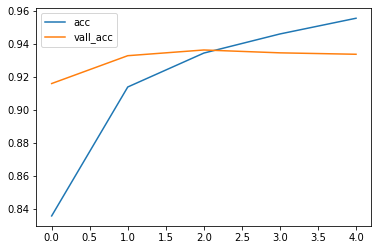

In [34]:
plt.plot(history.history["accuracy"],label="acc")
plt.plot(history.history["val_accuracy"],label="vall_acc")
plt.legend()
plt.show()

In [35]:
plt.savefig("Accuracy plot.jpg")

<Figure size 432x288 with 0 Axes>

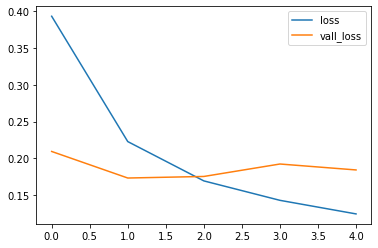

In [36]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="vall_loss")
plt.legend()
plt.show()

In [37]:
plt.savefig("Loss plt.jpg")

<Figure size 432x288 with 0 Axes>

    Let’s execute sentiment analysis model
Define a function that takes a text as input and outputs its prediction label.

------------------------------------------------------------------------------------------------------

    Duygu analizi modelini çalıştıralım
Bir metni girdi olarak alan ve tahmin etiketini çıkaran bir işlev tanımlayın.

In [38]:
def predict_sentiment(text):
    tw=tokenizer.texts_to_sequences([text])
    tw=pad_sequences(tw,maxlen=200)
    prediction=int(model.predict(tw).round().item())
    print("Predicted Label:",sentiment_label[1][prediction])

test_sentence1="I enjoyed my journey on this flight"
predict_sentiment(test_sentence1)

test_sentence2="This is the worst flight expreince of my life!"
predict_sentiment(test_sentence2)

Predicted Label: positive
Predicted Label: negative


In [51]:
test_sentence3="Amazon may be a large company their service is amazing. Prices are good and delivery is quick and dependable."
predict_sentiment(test_sentence3)

Predicted Label: positive


In [45]:
test_sentence4="Overnight Amazon deleted my 10+ year old account with all my data, orders, subscriptions, listings, credit cards, Prime membership, without notice and without my consent. In addition, I have purchased several protection plans that I will not be able to use, if necessary, as I no longer have access to the invoice for the insured product. I can't cancel these plans either, as I don't have access to my account."
predict_sentiment(test_sentence4)

Predicted Label: negative


In [52]:
test_sentence5="Amazon status was confusing on a product, but they would not respond. Had to contact original company. The original company said they will talk to Amazon, since they can not do anything about what is displayed on Amazon."
predict_sentiment(test_sentence5)

Predicted Label: negative


    SUMMARY
We have successfully developed python sentiment analysis model. In this machine learning project, we built a binary text classifier that classifies the sentiment of the tweets into positive and negative. We obtained more than 0.9446 accuracy on validation.

------------------------------------------------------------------------------------------------------

    ÖZET
Python duygu analizi modelini başarıyla geliştirdik. Bu makine öğrenimi projesinde, tweet'lerin duyarlılığını olumlu ve olumsuz olarak sınıflandıran bir ikili metin sınıflandırıcısı oluşturduk. Doğrulamada 0,9446'dan fazla doğruluk elde ettik.

This is an interesting project which helps businesses across the domains to understand customers sentiment / feeling towards their brands.

------------------------------------------------------------------------------------------------------


Bu, farklı alanlardaki işletmelerin müşterilerinin markalarına yönelik duygularını/duygularını anlamalarına yardımcı olan ilginç bir projedir.